Problem statement

Predict on whether a stock is a long or a short

Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

Retrieve files

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/shortlong-prediction/train.csv
/kaggle/input/shortlong-prediction/test.csv


Read files

In [3]:
train = pd.read_csv('/kaggle/input/shortlong-prediction/train.csv')
test = pd.read_csv('/kaggle/input/shortlong-prediction/test.csv')

In [4]:
train

,exchange,RSI,RSI_signal,ATR,EMA_relative,MA_relative,SMA_relative,WMA_relative,MACD,MACD_relative,...,Bollinger_lower_band,Bollinger_signal,ichimoku_c_conversion_line,ichimoku_c_base_line,ichimoku_c_leading_span_a,ichimoku_c_leading_span_b,ichimoku_c_signal,SAR_relative,s&p500_move_15m,result
0,Binance,32.000000,Hold,0.000347,1.002286,1.002714,-0.270648,-0.002280,-0.000136,-0.000455,...,-0.006569,Hold,0.216884,0.166834,0.417084,0.483817,Sell,0.282722,-2.927393,0
1,Binance,48.648649,Hold,0.000513,0.998955,0.999231,0.076998,0.001080,-0.000196,-0.000613,...,-0.003543,Hold,-0.093575,-0.093575,-0.015596,-0.171553,Buy,-0.086598,-4.592614,0
2,Binance,21.428571,Buy,0.000413,1.002658,1.003332,-0.332120,-0.002628,-0.000412,-0.001321,...,-0.008747,Hold,0.272349,0.608779,0.368472,-0.144185,Buy,0.286055,-0.833371,0
3,Binance,38.297872,Hold,0.000527,1.000234,1.000465,-0.046505,-0.000180,-0.000282,-0.000936,...,-0.004423,Hold,-0.049850,0.099701,0.324028,0.598205,Sell,0.113799,-1.242264,0
4,Binance,37.566138,Hold,0.002780,1.001247,1.001720,-0.171722,-0.001204,0.000670,0.002009,...,-0.024503,Hold,-0.030003,-0.765077,-5.670567,-5.205521,Sell,0.250892,-0.786651,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364617,Bybit,48.148148,Hold,0.000247,1.000583,1.000881,-0.088058,-0.000548,-0.000005,-0.000018,...,-0.003881,Hold,0.016949,-0.050847,0.364407,0.474576,Sell,0.063059,0.097210,1
364618,Bybit,55.263158,Hold,0.000813,0.996746,0.996439,0.357409,0.003522,0.000034,0.000129,...,-0.002683,Hold,-0.019216,-0.153728,-1.527671,-1.575711,Buy,-0.529103,-0.019837,1
364619,Bybit,44.202899,Hold,0.001520,1.000097,1.002317,-0.231125,0.000628,-0.000729,-0.002814,...,-0.011158,Hold,-0.019305,1.196911,-0.569498,-1.042471,Buy,0.128118,-0.171586,1
364620,Bybit,69.230769,Hold,0.000420,0.995291,0.994421,0.561042,0.004760,0.000255,0.000982,...,0.001613,Sell,-0.501350,-0.501350,-0.501350,-0.771307,Buy,-0.553876,2.919682,1


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364622 entries, 0 to 364621
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   exchange                    364622 non-null  object 
 1   RSI                         364622 non-null  float64
 2   RSI_signal                  364622 non-null  object 
 3   ATR                         364622 non-null  float64
 4   EMA_relative                364622 non-null  float64
 5   MA_relative                 364622 non-null  float64
 6   SMA_relative                364622 non-null  float64
 7   WMA_relative                364622 non-null  float64
 8   MACD                        364622 non-null  float64
 9   MACD_relative               364622 non-null  float64
 10  MACD_relative_signal        364622 non-null  float64
 11  MACD_relative_histogram     364622 non-null  float64
 12  ADX                         364622 non-null  float64
 13  Stoch_O_k_valu

In [6]:
for col in train:
    if train[col].dtype == 'int64' or train[col].dtype == 'object':
        print(col, train[col].nunique())

exchange 4
RSI_signal 3
Stoch_O_signal 3
fibonacci_signal 3
Bollinger_signal 3
ichimoku_c_signal 3
result 2


In [7]:
for col in train:
    if train[col].dtype == 'int64' or train[col].dtype == 'object':
        print(col, train[col].unique())

exchange ['Binance' 'Bybit' 'Huobi' 'OKX']
RSI_signal ['Hold' 'Buy' 'Sell']
Stoch_O_signal ['Sell' 'Buy' 'Hold']
fibonacci_signal ['Sell' 'Buy' 'Hold']
Bollinger_signal ['Hold' 'Buy' 'Sell']
ichimoku_c_signal ['Sell' 'Buy' 'Hold']
result [0 1]


In [8]:
train.isna().sum().sum()

0

In [9]:
train.describe()

,RSI,ATR,EMA_relative,MA_relative,SMA_relative,WMA_relative,MACD,MACD_relative,MACD_relative_signal,MACD_relative_histogram,...,VWAP_relative_long,Bollinger_upper_band,Bollinger_lower_band,ichimoku_c_conversion_line,ichimoku_c_base_line,ichimoku_c_leading_span_a,ichimoku_c_leading_span_b,SAR_relative,s&p500_move_15m,result
count,364622.000000,3.646220e+05,364622.000000,364622.000000,364622.000000,364622.000000,364622.000000,364622.000000,364622.000000,364622.000000,...,3.646220e+05,364622.000000,364622.000000,3.646220e+05,364622.000000,364622.000000,364622.000000,364622.000000,364622.000000,364622.000000
mean,50.792154,3.913544e-01,0.999722,0.999622,0.045035,0.000310,0.045229,0.000269,0.999818,-0.999548,...,4.097496e-03,0.014774,-0.013481,-1.750948e-02,-0.033534,-0.128842,-0.116710,-0.028767,0.016331,0.719156
std,18.460048,4.720881e+00,0.006311,0.008450,0.852787,0.006317,3.464729,0.004907,0.004463,0.007667,...,5.770182e-01,0.168581,0.168553,7.017593e-01,1.079125,20.749163,30.501262,2.565863,0.961717,0.449412
min,0.000000,2.000000e-14,0.711662,0.675621,-16.666667,-0.119530,-200.638588,-0.172726,0.754145,-1.213890,...,-5.885486e+01,-0.097264,-76.095356,-2.736546e+01,-27.420844,-65.218981,-68.472195,-34.040301,-4.971179,0.000000
25%,37.837838,3.466667e-04,0.997279,0.996290,-0.305984,-0.002277,-0.000792,-0.001706,0.998138,-1.002769,...,-1.544604e-05,0.005490,-0.018090,-3.189793e-01,-0.548112,-1.320545,-1.630435,-0.361808,-0.281445,0.000000
50%,50.331126,2.340000e-03,0.999835,0.999748,0.025205,0.000156,0.000003,0.000188,0.999916,-0.999703,...,6.091001e-10,0.011043,-0.009820,-2.031292e-14,-0.038139,-0.162338,-0.203165,-0.021052,0.031352,1.000000
75%,64.227642,1.200000e-02,1.002300,1.003069,0.372394,0.002689,0.001417,0.002215,1.001627,-0.996427,...,3.982531e-05,0.019253,-0.004537,2.886003e-01,0.465116,0.988024,1.215062,0.312583,0.342787,1.000000
max,99.836601,3.915000e+02,1.133215,1.200000,48.012024,0.413383,214.441528,0.197854,1.164631,-0.707264,...,1.458301e+02,76.089642,0.391432,2.099880e+01,53.923767,12421.841332,16165.915769,1473.561989,5.777996,1.000000


In [10]:
test

,exchange,RSI,RSI_signal,ATR,EMA_relative,MA_relative,SMA_relative,WMA_relative,MACD,MACD_relative,...,Bollinger_lower_band,Bollinger_signal,ichimoku_c_conversion_line,ichimoku_c_base_line,ichimoku_c_leading_span_a,ichimoku_c_leading_span_b,ichimoku_c_signal,SAR_relative,s&p500_move_15m,id
0,BC,16.666667,Buy,4.800000e-02,1.002921,1.003695,-0.368169,-0.002914,-4.786054e-02,-0.001551,...,-0.006836,Buy,0.194489,0.340357,0.883306,0.891410,Sell,0.398395,-0.190541,0
1,BC,45.454545,Hold,1.933333e-03,1.000872,1.001068,-0.106667,-0.000916,-4.662344e-04,-0.000249,...,-0.003590,Hold,0.106781,0.160171,0.026695,0.053390,Sell,0.153864,-0.090615,1
2,BC,39.597315,Hold,1.953333e-03,0.999698,1.000051,-0.005122,0.000381,-4.067109e-04,-0.000284,...,-0.003828,Hold,-0.052389,-0.027941,0.132719,0.499441,Sell,-0.001606,0.036613,2
3,BC,55.151515,Hold,2.313333e-03,0.998470,0.998471,0.153116,0.001598,-1.799609e-04,-0.000138,...,-0.004911,Hold,-0.198746,-0.156704,0.301942,0.389849,Sell,-0.144702,-0.032027,3
4,BC,18.279570,Buy,1.346667e-03,1.004484,1.005530,-0.549954,-0.004507,-1.079659e-03,-0.001843,...,-0.009261,Buy,0.358423,0.512033,0.934460,0.981396,Sell,0.645833,-0.190541,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,HB,63.157895,Hold,6.600000e-07,0.994270,0.993057,0.699134,0.005917,4.264418e-07,0.002523,...,-0.005855,Hold,-0.295858,-0.946746,-0.828402,-1.479290,Buy,-0.808390,-0.316902,1155
1156,HB,66.666667,Hold,1.573333e-03,0.998687,0.998070,0.193344,0.001316,1.018109e-03,0.000849,...,-0.005825,Hold,-0.212713,-0.212713,0.389973,-0.442109,Buy,-0.245203,1.248114,1156
1157,HB,73.529412,Sell,1.406667e-03,0.998333,0.997942,0.206233,0.001718,8.789408e-04,0.000419,...,-0.001353,Hold,-0.095429,-0.095429,-0.155072,-0.312530,Buy,-0.224053,1.248114,1157
1158,HB,50.279330,Hold,1.893333e-04,1.000452,1.000375,-0.037508,-0.000479,8.038671e-05,0.000411,...,-0.003063,Hold,0.040933,-0.023025,-0.309558,-0.583299,Buy,0.001896,1.248114,1158


In [11]:
for col in test:
    if test[col].dtype == 'int64' or test[col].dtype == 'object':
        print(col, test[col].nunique())

exchange 4
RSI_signal 3
Stoch_O_signal 3
fibonacci_signal 3
Bollinger_signal 3
ichimoku_c_signal 3
id 1160


Define exchange

In [12]:
train['exchange'] = train['exchange'].str.replace('Binance','BC')
train['exchange'] = train['exchange'].str.replace('Bybit','BB')
train['exchange'] = train['exchange'].str.replace('Huobi','HB')
train['exchange'] = train['exchange'].str.replace('OKX','OK')

Define id numbers

In [13]:
test_id = test.pop('id')
test_id

0          0
1          1
2          2
3          3
4          4
        ... 
1155    1155
1156    1156
1157    1157
1158    1158
1159    1159
Name: id, Length: 1160, dtype: int64

Analyse target

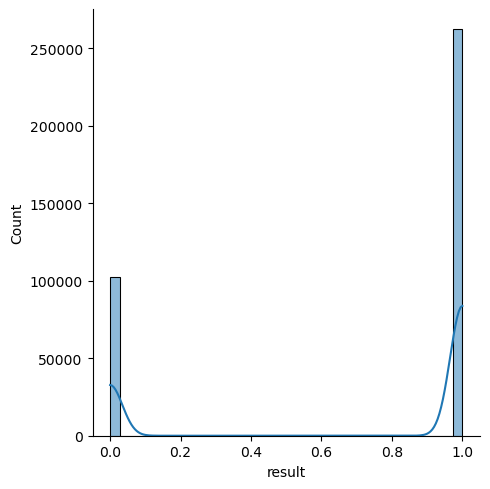

In [14]:
target = train.pop('result')

sns.displot(target, kde=True)

Check if columns come from the same distribution

In [15]:
from scipy import stats

to_drop = []

for col in train:
    stat, pv = stats.ks_2samp(train[col], test[col])
    if pv < 0.05:
        print(col, 'is not drawn from the same distribution.')
        to_drop.append(col)
        
print(to_drop)

#train.drop(to_drop, axis=1, inplace=True)
#test.drop(to_drop, axis=1, inplace=True)

print(train.shape, test.shape)

exchange is not drawn from the same distribution.
ATR is not drawn from the same distribution.
EMA_relative is not drawn from the same distribution.
MA_relative is not drawn from the same distribution.
SMA_relative is not drawn from the same distribution.
WMA_relative is not drawn from the same distribution.
MACD is not drawn from the same distribution.
MACD_relative is not drawn from the same distribution.
MACD_relative_signal is not drawn from the same distribution.
MACD_relative_histogram is not drawn from the same distribution.
Stoch_O_k_value is not drawn from the same distribution.
Stoch_O_k_smoothed is not drawn from the same distribution.
Stoch_O_d_value is not drawn from the same distribution.
Stoch_O_signal_value is not drawn from the same distribution.
pivot_point is not drawn from the same distribution.
pivot_resistance_1 is not drawn from the same distribution.
pivot_support_2 is not drawn from the same distribution.
pivot_resistance_2 is not drawn from the same distributi

Encode features

In [16]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

for col in train:
    if train[col].dtype == 'object':
        train[col] = enc.fit_transform(train[col].values.reshape(-1,1))
        test[col] = enc.transform(test[col].values.reshape(-1,1))
        
train

,exchange,RSI,RSI_signal,ATR,EMA_relative,MA_relative,SMA_relative,WMA_relative,MACD,MACD_relative,...,Bollinger_upper_band,Bollinger_lower_band,Bollinger_signal,ichimoku_c_conversion_line,ichimoku_c_base_line,ichimoku_c_leading_span_a,ichimoku_c_leading_span_b,ichimoku_c_signal,SAR_relative,s&p500_move_15m
0,1.0,32.000000,1.0,0.000347,1.002286,1.002714,-0.270648,-0.002280,-0.000136,-0.000455,...,0.001013,-0.006569,1.0,0.216884,0.166834,0.417084,0.483817,2.0,0.282722,-2.927393
1,1.0,48.648649,1.0,0.000513,0.998955,0.999231,0.076998,0.001080,-0.000196,-0.000613,...,0.004261,-0.003543,1.0,-0.093575,-0.093575,-0.015596,-0.171553,0.0,-0.086598,-4.592614
2,1.0,21.428571,0.0,0.000413,1.002658,1.003332,-0.332120,-0.002628,-0.000412,-0.001321,...,0.001150,-0.008747,1.0,0.272349,0.608779,0.368472,-0.144185,0.0,0.286055,-0.833371
3,1.0,38.297872,1.0,0.000527,1.000234,1.000465,-0.046505,-0.000180,-0.000282,-0.000936,...,0.001933,-0.004423,1.0,-0.049850,0.099701,0.324028,0.598205,2.0,0.113799,-1.242264
4,1.0,37.566138,1.0,0.002780,1.001247,1.001720,-0.171722,-0.001204,0.000670,0.002009,...,0.024233,-0.024503,1.0,-0.030003,-0.765077,-5.670567,-5.205521,2.0,0.250892,-0.786651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364617,0.0,48.148148,1.0,0.000247,1.000583,1.000881,-0.088058,-0.000548,-0.000005,-0.000018,...,0.003102,-0.003881,1.0,0.016949,-0.050847,0.364407,0.474576,2.0,0.063059,0.097210
364618,0.0,55.263158,1.0,0.000813,0.996746,0.996439,0.357409,0.003522,0.000034,0.000129,...,0.009238,-0.002683,1.0,-0.019216,-0.153728,-1.527671,-1.575711,0.0,-0.529103,-0.019837
364619,0.0,44.202899,1.0,0.001520,1.000097,1.002317,-0.231125,0.000628,-0.000729,-0.002814,...,0.005883,-0.011158,1.0,-0.019305,1.196911,-0.569498,-1.042471,0.0,0.128118,-0.171586
364620,0.0,69.230769,1.0,0.000420,0.995291,0.994421,0.561042,0.004760,0.000255,0.000982,...,0.009829,0.001613,2.0,-0.501350,-0.501350,-0.501350,-0.771307,0.0,-0.553876,2.919682


Heatmap

<Axes: >

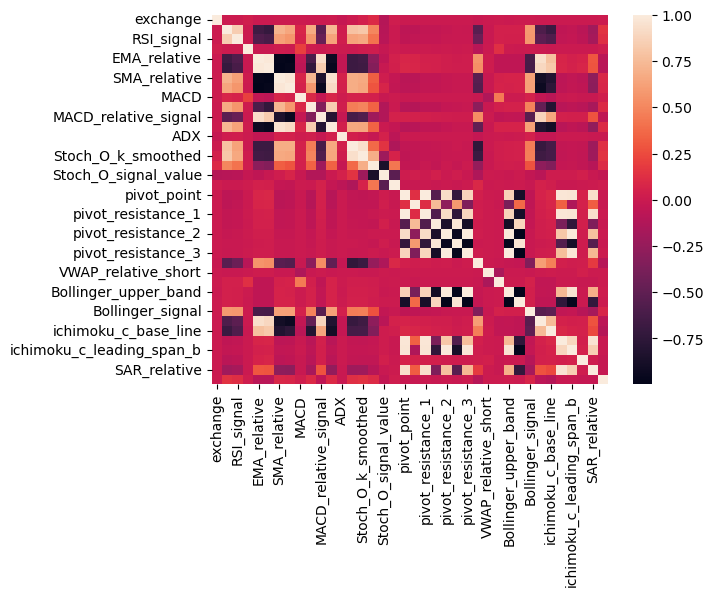

In [17]:
corr = train.corr()
sns.heatmap(corr)

In [18]:
corr

,exchange,RSI,RSI_signal,ATR,EMA_relative,MA_relative,SMA_relative,WMA_relative,MACD,MACD_relative,...,Bollinger_upper_band,Bollinger_lower_band,Bollinger_signal,ichimoku_c_conversion_line,ichimoku_c_base_line,ichimoku_c_leading_span_a,ichimoku_c_leading_span_b,ichimoku_c_signal,SAR_relative,s&p500_move_15m
exchange,1.000000,0.007147,0.003007,0.029529,-0.003220,-0.002545,0.002555,0.003292,0.003218,-0.000634,...,-0.001765,0.001965,0.001197,-0.005800,-0.004914,-0.001517,-0.002156,-0.000437,-0.002578,0.007116
RSI,0.007147,1.000000,0.843457,0.005644,-0.662845,-0.711227,0.706173,0.640921,0.075149,0.668527,...,0.043786,0.045025,0.579617,-0.586060,-0.692286,-0.060147,-0.042787,-0.078082,-0.200453,0.145642
RSI_signal,0.003007,0.843457,1.000000,0.003723,-0.581476,-0.619408,0.615072,0.563719,0.063117,0.564254,...,0.037017,0.039551,0.572689,-0.520661,-0.583601,-0.052163,-0.037223,-0.067751,-0.171397,0.121158
ATR,0.029529,0.005644,0.003723,1.000000,-0.007402,-0.008943,0.009479,0.007374,0.208143,0.010399,...,0.001919,-0.000680,0.003355,-0.005815,-0.007859,-0.001180,-0.001063,-0.006023,-0.002674,0.017396
EMA_relative,-0.003220,-0.662845,-0.581476,-0.007402,1.000000,0.980038,-0.979588,-0.997423,-0.053537,-0.608031,...,-0.053982,-0.057376,-0.618703,0.930239,0.779887,0.064211,0.046653,0.062792,0.292069,-0.080382
MA_relative,-0.002545,-0.711227,-0.619408,-0.008943,0.980038,1.000000,-0.998400,-0.967612,-0.063659,-0.729408,...,-0.057473,-0.059297,-0.626322,0.895162,0.815404,0.071360,0.051123,0.072117,0.283352,-0.087614
SMA_relative,0.002555,0.706173,0.615072,0.009479,-0.979588,-0.998400,1.000000,0.969842,0.063655,0.725797,...,0.058366,0.058588,0.622709,-0.893243,-0.812503,-0.071127,-0.050950,-0.071529,-0.283078,0.086576
WMA_relative,0.003292,0.640921,0.563719,0.007374,-0.997423,-0.967612,0.969842,1.000000,0.050411,0.571459,...,0.053473,0.055905,0.610043,-0.931316,-0.761899,-0.061913,-0.044996,-0.059772,-0.291989,0.077846
MACD,0.003218,0.075149,0.063117,0.208143,-0.053537,-0.063659,0.063655,0.050411,1.000000,0.088273,...,0.004664,0.004409,0.055014,-0.041446,-0.077645,-0.008820,-0.006543,-0.018386,-0.015040,0.027513
MACD_relative,-0.000634,0.668527,0.564254,0.010399,-0.608031,-0.729408,0.725797,0.571459,0.088273,1.000000,...,0.053181,0.049819,0.479544,-0.478778,-0.809175,-0.092090,-0.063621,-0.086138,-0.170823,0.101204


In [19]:
# Create correlation matrix
corr_matrix = train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(to_drop)

# Drop features 
train.drop(to_drop, axis=1, inplace=True)
test.drop(to_drop, axis=1, inplace=True)

print(train.shape, test.shape)

['MA_relative', 'SMA_relative', 'WMA_relative', 'MACD_relative_histogram', 'pivot_resistance_1', 'pivot_support_3', 'pivot_resistance_3', 'Bollinger_upper_band', 'Bollinger_lower_band', 'ichimoku_c_leading_span_a', 'ichimoku_c_leading_span_b', 'SAR_relative']
(364622, 26) (1160, 26)


Standardise data

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for col in train:
    train[col] = scaler.fit_transform(train[col].values.reshape(-1,1))
    test[col] = scaler.transform(test[col].values.reshape(-1,1))
train

,exchange,RSI,RSI_signal,ATR,EMA_relative,MACD,MACD_relative,MACD_relative_signal,ADX,Stoch_O_k_value,...,pivot_support_2,pivot_resistance_2,fibonacci_signal,VWAP_relative_short,VWAP_relative_long,Bollinger_signal,ichimoku_c_conversion_line,ichimoku_c_base_line,ichimoku_c_signal,s&p500_move_15m
0,-0.159266,-1.017992,-0.040358,-0.082825,0.406259,-0.013093,-0.147563,0.437066,-0.027034,-1.652575,...,0.189183,-0.073825,0.925980,-0.002176,-0.007111,-0.058698,0.334008,0.185676,1.044458,-3.060910
1,-0.159266,-0.116116,-0.040358,-0.082790,-0.121542,-0.013111,-0.179729,-0.237401,-1.368045,0.329470,...,0.147377,-0.075607,-1.081928,-0.002303,-0.007089,-0.058698,-0.108392,-0.055638,-0.966607,-4.792421
2,-0.159266,-1.590658,-1.887860,-0.082811,0.465178,-0.013173,-0.324005,0.483712,1.039150,-1.473640,...,0.152878,-0.064383,0.925980,-0.002249,-0.007147,-0.058698,0.413045,0.595217,-0.966607,-0.883528
3,-0.159266,-0.676829,-0.040358,-0.082787,0.081175,-0.013135,-0.245618,0.077148,-0.090988,-0.400033,...,0.188449,-0.073113,-1.081928,-0.002184,-0.007111,-0.058698,-0.046086,0.123466,1.044458,-1.308699
4,-0.159266,-0.716468,-0.040358,-0.082310,0.241703,-0.012861,0.354436,0.427698,-1.220839,-0.689338,...,-0.297086,0.005634,0.925980,-0.002192,-0.006903,-0.058698,-0.017803,-0.677904,1.044458,-0.834948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364617,-1.006002,-0.143229,-0.040358,-0.082846,0.136437,-0.013056,-0.058572,0.076094,-1.242289,-0.166041,...,0.175248,-0.064205,0.925980,-0.002157,-0.007109,-0.058698,0.049103,-0.016044,1.044458,0.084099
364618,-1.006002,0.242199,-0.040358,-0.082726,-0.471527,-0.013044,-0.028624,-0.588631,-0.489255,-0.042163,...,0.060465,-0.074182,0.925980,-0.002230,-0.006467,-0.058698,-0.002432,-0.111381,-0.966607,-0.037608
364619,-1.006002,-0.356947,-0.040358,-0.082577,0.059514,-0.013264,-0.628370,-0.407804,-1.394170,-1.176771,...,0.023426,-0.031245,0.925980,-0.002209,-0.007109,-0.058698,-0.002559,1.140226,-0.966607,-0.195398
364620,-1.006002,0.998840,-0.040358,-0.082810,-0.702025,-0.012981,0.145184,-0.767872,-1.189971,1.568248,...,0.137109,-0.087544,-1.081928,-0.002160,-0.006985,2.575470,-0.689469,-0.433515,-0.966607,3.018930


Define X and y

In [21]:
y = target
X = train
X_test = test

Split dataset into training and validation sets

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape

((328159, 26), (36463, 26), (328159,), (36463,), (1160, 26))

In [23]:
from sklearn.metrics import (
    roc_auc_score, 
    f1_score, 
    precision_score, 
    recall_score,
    confusion_matrix,
    classification_report
)

#查看数据

In [24]:
X_train

,exchange,RSI,RSI_signal,ATR,EMA_relative,MACD,MACD_relative,MACD_relative_signal,ADX,Stoch_O_k_value,...,pivot_support_2,pivot_resistance_2,fibonacci_signal,VWAP_relative_short,VWAP_relative_long,Bollinger_signal,ichimoku_c_conversion_line,ichimoku_c_base_line,ichimoku_c_signal,s&p500_move_15m
51666,1.534207,0.253105,-0.040358,-0.082571,0.891987,-0.012945,0.137359,1.103452,-0.845895,-0.765529,...,0.030394,0.033427,0.925980,-0.002207,-0.007135,-0.058698,0.821882,0.189912,-0.966607,-2.284105
248764,1.534207,-0.945764,-0.040358,-0.076544,0.235303,-0.014657,-0.113440,0.267508,0.125998,-1.192457,...,0.170114,-0.044785,0.925980,-0.001780,-0.007593,-0.058698,0.172313,0.198778,1.044458,0.578033
83988,1.534207,-1.501365,-1.887860,-0.082009,0.396729,-0.014477,-0.471350,0.317995,1.161810,-1.463115,...,0.172681,-0.059038,0.925980,-0.001504,-0.007193,-0.058698,0.438334,0.434312,0.038925,-0.613460
28396,-1.006002,-0.429848,-0.040358,-0.082729,0.160039,-0.013079,-0.112937,0.050457,-1.165443,-0.578967,...,0.085768,0.037881,0.925980,-0.002157,-0.007293,-0.058698,0.261661,-0.122858,1.044458,0.071716
280026,-0.159266,1.657809,1.807144,-0.082707,-0.176020,-0.012868,0.142893,-0.110331,-0.004085,0.824981,...,0.171947,-0.087544,-1.081928,-0.002068,-0.007008,-0.058698,-0.103852,-0.115507,-0.966607,-0.068252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76096,-0.159266,-1.220545,-1.887860,-0.063128,0.969909,-0.028376,-0.429211,1.075849,0.416051,-0.793689,...,0.116939,0.025766,0.925980,0.005784,-0.027766,-0.058698,0.591989,0.672375,1.044458,0.118413
219512,0.687471,-1.286874,-1.887860,-0.067033,1.462312,-0.032292,-3.531177,0.259390,0.940764,-0.710999,...,-0.012145,0.397585,0.925980,0.001059,-0.010454,-0.058698,2.050963,2.501283,1.044458,-0.060717
244151,1.534207,-1.524952,-1.887860,-0.082879,0.627872,-0.013083,-1.018384,0.463089,0.433396,-1.548677,...,-0.010312,-0.020021,0.925980,-0.002157,-0.007103,-0.058698,0.736769,1.199342,-0.966607,-0.008820
119630,-0.159266,1.194773,1.807144,0.330443,-0.180325,0.189778,0.027463,-0.220999,-1.202003,1.432764,...,0.142243,-0.086831,-1.081928,-0.529209,0.061362,-0.058698,-0.171370,-0.289028,-0.966607,0.155503


In [25]:
X_val

,exchange,RSI,RSI_signal,ATR,EMA_relative,MACD,MACD_relative,MACD_relative_signal,ADX,Stoch_O_k_value,...,pivot_support_2,pivot_resistance_2,fibonacci_signal,VWAP_relative_short,VWAP_relative_long,Bollinger_signal,ichimoku_c_conversion_line,ichimoku_c_base_line,ichimoku_c_signal,s&p500_move_15m
261971,1.534207,-1.317526,-1.887860,-0.076007,0.660001,-0.024220,-0.897502,0.529778,1.373420,-1.087518,...,0.128674,0.007594,0.925980,0.000046,-0.007380,-0.058698,0.481874,1.061157,1.044458,2.082707
236374,1.534207,-0.042912,-0.040358,-0.082695,0.388021,-0.013127,-0.271431,0.341008,-1.299225,-0.408166,...,0.089802,0.008663,0.925980,-0.002171,-0.007118,-0.058698,0.325582,0.304777,1.044458,0.027924
207238,-1.006002,-0.313767,-0.040358,-0.082859,-0.085543,-0.013085,-0.251109,-0.152137,-1.307631,0.187895,...,0.126841,-0.043895,-1.081928,-0.002153,-0.007107,-0.058698,-0.103427,0.365013,1.044458,0.099744
99084,-1.006002,-1.367095,-1.887860,-0.082815,1.351200,-0.013182,-1.414505,1.184196,1.327920,-1.503265,...,0.106305,0.092220,0.925980,-0.002148,-0.007162,-2.692867,1.365237,1.662697,1.044458,-0.023366
293754,-0.159266,-0.575594,-0.040358,-0.081063,0.390785,-0.013807,-0.432306,0.355144,1.098910,0.097145,...,0.115106,0.001893,0.925980,-0.001463,-0.007498,-0.058698,-0.217756,-0.031401,1.044458,0.049252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100386,1.534207,0.746195,-0.040358,-0.082440,-0.668014,-0.012623,0.768093,-0.683519,-1.177510,0.977764,...,-0.140497,0.152259,-1.081928,-0.001508,-0.007258,-0.058698,-0.823718,-0.984909,1.044458,-0.278192
81818,0.687471,-0.081331,-0.040358,-0.082898,0.215806,-0.013054,-0.391952,0.370814,-1.371274,-0.543180,...,0.134175,-0.000067,0.925980,-0.002157,-0.007101,-0.058698,0.261582,0.685074,1.044458,0.053910
196435,-1.006002,0.010197,-0.040358,-0.027824,0.254419,0.003297,0.067829,0.564718,-1.053112,-0.296439,...,0.055697,-0.045142,-1.081928,-0.026648,-0.004054,-0.058698,0.138587,0.154238,-0.966607,1.050996
156062,-1.006002,-0.042912,-0.040358,-0.082828,0.182255,-0.013028,0.008796,0.221312,0.831738,-0.042163,...,0.178548,-0.080774,0.925980,-0.002157,-0.007101,-0.058698,0.024951,0.112078,1.044458,-0.835209


In [26]:
y_train

51666     0
248764    1
83988     0
28396     0
280026    1
         ..
76096     0
219512    1
244151    1
119630    1
207203    1
Name: result, Length: 328159, dtype: int64

In [27]:
y_val

261971    1
236374    1
207238    1
99084     0
293754    1
         ..
100386    0
81818     0
196435    1
156062    1
317407    1
Name: result, Length: 36463, dtype: int64

#逻辑回归（Logistic Regression）

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# 标准化数据（逻辑回归需要特征缩放）
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 初始化逻辑回归模型
lr_model = LogisticRegression(
    penalty='l2',
    C=0.1,
    solver='liblinear',
    class_weight='balanced',
    random_state=42
)

# 训练模型
lr_model.fit(X_train_scaled, y_train)

# 预测验证集
lr_pred_proba = lr_model.predict_proba(X_val_scaled)[:, 1]
lr_pred = lr_model.predict(X_val_scaled)

# 计算指标
lr_auc = roc_auc_score(y_val, lr_pred_proba)
lr_f1 = f1_score(y_val, lr_pred)
lr_precision = precision_score(y_val, lr_pred)
lr_recall = recall_score(y_val, lr_pred)

#K近邻（KNN）

In [29]:
from sklearn.neighbors import KNeighborsClassifier

# 初始化KNN模型
knn_model = KNeighborsClassifier(
    n_neighbors=5,
    weights='distance'  # 距离加权投票
)

# 训练模型
knn_model.fit(X_train_scaled, y_train)

# 预测验证集
knn_pred_proba = knn_model.predict_proba(X_val_scaled)[:, 1]
knn_pred = knn_model.predict(X_val_scaled)

# 计算指标
knn_auc = roc_auc_score(y_val, knn_pred_proba)
knn_f1 = f1_score(y_val, knn_pred)
knn_precision = precision_score(y_val, knn_pred)
knn_recall = recall_score(y_val, knn_pred)

#随机森林模型（Random Forest）

In [30]:
from sklearn.ensemble import RandomForestClassifier

# 初始化随机森林模型
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    class_weight='balanced',  # 处理类别不平衡
    random_state=42
)

# 训练模型
rf_model.fit(X_train, y_train)

# 预测验证集
rf_pred_proba = rf_model.predict_proba(X_val)[:, 1]
rf_pred = rf_model.predict(X_val)

# 计算指标
rf_auc = roc_auc_score(y_val, rf_pred_proba)
rf_f1 = f1_score(y_val, rf_pred)
rf_precision = precision_score(y_val, rf_pred)
rf_recall = recall_score(y_val, rf_pred)

# 特征重要性（与XGBoost类似）
rf_importance = sorted(
    zip(X_train.columns, rf_model.feature_importances_),
    key=lambda x: x[1], 
    reverse=True
)

#Light GBM 模型（梯度提升决策树）

In [31]:
import lightgbm as lgb

# 初始化LightGBM模型
lgb_model = lgb.LGBMClassifier(
    objective='binary',
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# 训练模型
lgb_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    early_stopping_rounds=10,
    verbose=False
)

# 预测验证集
lgb_pred_proba = lgb_model.predict_proba(X_val)[:, 1]
lgb_pred = lgb_model.predict(X_val)

# 计算指标
lgb_auc = roc_auc_score(y_val, lgb_pred_proba)
lgb_f1 = f1_score(y_val, lgb_pred)
lgb_precision = precision_score(y_val, lgb_pred)
lgb_recall = recall_score(y_val, lgb_pred)

/opt/conda/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


#XGBoost模型（梯度提升决策树）

In [32]:
# 1. 导入必要的库
import xgboost as xgb

# 2. 初始化XGBoost分类器
model = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='auc'
)

# 3. 训练模型
model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    early_stopping_rounds=10,
    verbose=True
)

# 4. 预测验证集的概率和类别
y_pred_proba = model.predict_proba(X_val)[:, 1]  # 概率预测
y_pred = model.predict(X_val)                     # 类别预测（默认阈值0.5）

# 5. 计算各项指标
xgb_auc = roc_auc_score(y_val, y_pred_proba)
xgb_f1 = f1_score(y_val, y_pred)
xgb_precision = precision_score(y_val, y_pred)
xgb_recall = recall_score(y_val, y_pred)

# 6. 特征重要性分析（可选）
importances = model.feature_importances_
feature_names = X_train.columns

# 将特征重要性排序显示
feature_importance = sorted(
    zip(feature_names, importances),
    key=lambda x: x[1], 
    reverse=True
)

print("\nFeature Importance:")
for feat, imp in feature_importance:
    print(f"{feat}: {imp:.4f}")

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.90959
[1]	validation_0-auc:0.91094
[2]	validation_0-auc:0.91573
[3]	validation_0-auc:0.91651
[4]	validation_0-auc:0.91649
[5]	validation_0-auc:0.92142
[6]	validation_0-auc:0.91989
[7]	validation_0-auc:0.91720
[8]	validation_0-auc:0.91967
[9]	validation_0-auc:0.92114
[10]	validation_0-auc:0.92034
[11]	validation_0-auc:0.92217
[12]	validation_0-auc:0.92279
[13]	validation_0-auc:0.92350
[14]	validation_0-auc:0.92324
[15]	validation_0-auc:0.92424
[16]	validation_0-auc:0.92394
[17]	validation_0-auc:0.92466
[18]	validation_0-auc:0.92566
[19]	validation_0-auc:0.92613
[20]	validation_0-auc:0.92613
[21]	validation_0-auc:0.92674
[22]	validation_0-auc:0.92744
[23]	validation_0-auc:0.92754
[24]	validation_0-auc:0.92758
[25]	validation_0-auc:0.92815
[26]	validation_0-auc:0.92849
[27]	validation_0-auc:0.92891
[28]	validation_0-auc:0.92914
[29]	validation_0-auc:0.92921
[30]	validation_0-auc:0.92944
[31]	validation_0-auc:0.92948
[32]	validation_0-auc:0.92952
[33]	validation_0-au

#模型结果综合比较

In [33]:
import pandas as pd

# 汇总指标
results = {
    'Model': ['Logistic Regression', 'KNN', 'Random Forest','LightGBM','XGBoost'],
    'AUC': [lr_auc, knn_auc, rf_auc, lgb_auc,xgb_auc],
    'F1-score': [lr_f1, knn_f1, rf_f1,lgb_f1,xgb_f1],
    'Precision': [lr_precision, knn_precision, rf_precision, lgb_precision,xgb_precision],
    'Recall': [lr_recall, knn_recall, rf_recall, lgb_recall,xgb_recall]
}

results_df = pd.DataFrame(results)
results_df.sort_values(by='AUC', ascending=False)

,Model,AUC,F1-score,Precision,Recall
4,XGBoost,0.934741,0.923501,0.891785,0.957556
3,LightGBM,0.933538,0.922383,0.891653,0.955306
0,Logistic Regression,0.918793,0.900256,0.915409,0.885597
2,Random Forest,0.908810,0.907468,0.917388,0.897762
1,KNN,0.882295,0.910131,0.876390,0.946574


#使用多层感知机MLP进行分类

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [36]:
# 数据标准化（适用于神经网络）
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [37]:
# 定义MLP架构
def create_mlp(input_dim):
    model = Sequential([
        Dense(128, activation='swish', input_dim=input_dim,
              kernel_initializer='he_normal'),
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(64, activation='swish',
              kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
        BatchNormalization(),
        Dropout(0.2),
        
        Dense(1, activation='sigmoid')
    ])
    
    optimizer = Nadam(learning_rate=1e-3)
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=[
            tf.keras.metrics.AUC(name='auc', curve='ROC'),  
            tf.keras.metrics.Precision(name='precision'),
            tf.keras.metrics.Recall(name='recall'),
            tf.keras.metrics.AUC(name='pr_auc', curve='PR') 
        ]
    )
    return model

# 初始化模型
mlp_model = create_mlp(input_dim=X_train_scaled.shape[1])
# 定义回调函数
callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True, monitor='val_f1')
]
class F1Metric(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        # 保持原有F1计算逻辑
        val_pred = (self.model.predict(X_val_scaled, verbose=0) > 0.5).astype(int)
        logs['val_f1'] = f1_score(y_val, val_pred)
        
        # AUC计算
        val_proba = self.model.predict(X_val_scaled, verbose=0)
        logs['val_roc_auc'] = roc_auc_score(y_val, val_proba)
        print(f" | val_roc_auc: {logs['val_roc_auc']:.4f}", end='')

In [38]:
# 模型训练
history = mlp_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=100,
    batch_size=256,
    class_weight={0: 3.0, 1: 1.0},  # 根据类别不平衡调整权重
    callbacks=[F1Metric(), callbacks],
    verbose=1
)

Epoch 1/100
1282/1282 [==============================] - 15s 10ms/step - loss: 0.6140 - auc: 0.9041 - precision: 0.9183 - recall: 0.8216 - pr_auc: 0.9552 - val_loss: 0.3753 - val_auc: 0.9241 - val_precision: 0.9268 - val_recall: 0.8542 - val_pr_auc: 0.9652 - val_f1: 0.8890 - val_roc_auc: 0.9241
Epoch 2/100
1282/1282 [==============================] - 12s 9ms/step - loss: 0.5604 - auc: 0.9200 - precision: 0.9246 - recall: 0.8468 - pr_auc: 0.9633 - val_loss: 0.3671 - val_auc: 0.9270 - val_precision: 0.9298 - val_recall: 0.8495 - val_pr_auc: 0.9668 - val_f1: 0.8878 - val_roc_auc: 0.9270
Epoch 3/100
1282/1282 [==============================] - 12s 9ms/step - loss: 0.5484 - auc: 0.9234 - precision: 0.9263 - recall: 0.8521 - pr_auc: 0.9649 - val_loss: 0.3631 - val_auc: 0.9277 - val_precision: 0.9297 - val_recall: 0.8527 - val_pr_auc: 0.9671 - val_f1: 0.8896 - val_roc_auc: 0.9277
Epoch 4/100
1282/1282 [==============================] - 12s 9ms/step - loss: 0.5411 - auc: 0.9253 - precision: 0.

In [39]:
# 验证集评估
from sklearn.metrics import roc_auc_score  # 确保导入AUC计算函数

y_pred_proba = mlp_model.predict(X_val_scaled).ravel()  # 确保输出是1D数组
y_pred = (y_pred_proba > 0.5).astype(int)

print("\nMLP Validation Metrics:")
print(f"AUC: {roc_auc_score(y_val, y_pred_proba):.4f}")      # 新增AUC指标
print(f"F1 Score: {f1_score(y_val, y_pred):.4f}")
print(f"Precision: {precision_score(y_val, y_pred):.4f}")
print(f"Recall: {recall_score(y_val, y_pred):.4f}")

# 建议同时输出分类报告
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_val, y_pred, target_names=['Short', 'Long']))

1140/1140 [==============================] - 1s 1ms/step

MLP Validation Metrics:
AUC: 0.9270
F1 Score: 0.8660
Precision: 0.9406
Recall: 0.8023

Classification Report:
              precision    recall  f1-score   support

       Short       0.63      0.87      0.73     10240
        Long       0.94      0.80      0.87     26223

    accuracy                           0.82     36463
   macro avg       0.79      0.84      0.80     36463
weighted avg       0.85      0.82      0.83     36463



In [40]:
# ========== MLP 评估部分 ==========
# 预测验证集
y_pred_proba = mlp_model.predict(X_val_scaled).ravel()
y_pred = (y_pred_proba > 0.5).astype(int)

# 计算并存储指标
mlp_auc = roc_auc_score(y_val, y_pred_proba)
mlp_f1 = f1_score(y_val, y_pred)
mlp_precision = precision_score(y_val, y_pred)
mlp_recall = recall_score(y_val, y_pred)

# 打印结果
print("\nMLP Validation Metrics:")
print(f"AUC: {mlp_auc:.4f}")
print(f"F1 Score: {mlp_f1:.4f}")
print(f"Precision: {mlp_precision:.4f}")
print(f"Recall: {mlp_recall:.4f}")

1140/1140 [==============================] - 1s 1ms/step

MLP Validation Metrics:
AUC: 0.9270
F1 Score: 0.8660
Precision: 0.9406
Recall: 0.8023


In [41]:
# ========== 汇总表格部分 ==========
results = {
    'Model': ['Logistic Regression', 'KNN', 'Random Forest','LightGBM','XGBoost', 'MLP'],
    'AUC': [lr_auc, knn_auc, rf_auc, lgb_auc, xgb_auc, mlp_auc],
    'F1-score': [lr_f1, knn_f1, rf_f1, lgb_f1, xgb_f1, mlp_f1],
    'Precision': [lr_precision, knn_precision, rf_precision, lgb_precision, xgb_precision, mlp_precision],
    'Recall': [lr_recall, knn_recall, rf_recall, lgb_recall, xgb_recall, mlp_recall]
}

results_df = pd.DataFrame(results).sort_values(by='AUC', ascending=False)
results_df

,Model,AUC,F1-score,Precision,Recall
4,XGBoost,0.934741,0.923501,0.891785,0.957556
3,LightGBM,0.933538,0.922383,0.891653,0.955306
5,MLP,0.926987,0.865981,0.940627,0.802311
0,Logistic Regression,0.918793,0.900256,0.915409,0.885597
2,Random Forest,0.908810,0.907468,0.917388,0.897762
1,KNN,0.882295,0.910131,0.876390,0.946574


通过阈值优化处理数据不平衡问题，以优化模型结果

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    roc_curve, 
    precision_recall_curve, 
    confusion_matrix,
    auc
)
from matplotlib.gridspec import GridSpec

# ================= 通用阈值优化函数 =================
def optimize_threshold(y_true, y_proba):
    """寻找最佳F1阈值"""
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_proba)
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-9)
    best_idx = np.argmax(f1_scores)
    return thresholds[best_idx], f1_scores[best_idx], precisions[best_idx], recalls[best_idx]

# ================= 模型预测和优化 =================
models = {
    'Logistic Regression': lr_model,
    'KNN': knn_model,
    'Random Forest': rf_model,
    'LightGBM': lgb_model,
    'XGBoost': model,
    'MLP': mlp_model
}

results = []
threshold_dict = {}

for model_name, model in models.items():
    # 获取预测概率
    if model_name == 'MLP':
        y_proba = model.predict(X_val_scaled).ravel()
    else:
        y_proba = model.predict_proba(X_val)[:, 1]
    
    # 原始阈值0.5的指标
    y_pred = (y_proba >= 0.5).astype(int)
    base_metrics = {
        'AUC': roc_auc_score(y_val, y_proba),
        'F1': f1_score(y_val, y_pred),
        'Precision': precision_score(y_val, y_pred),
        'Recall': recall_score(y_val, y_pred)
    }
    
    # 优化阈值
    best_threshold, best_f1, best_precision, best_recall = optimize_threshold(y_val, y_proba)
    optimized_pred = (y_proba >= best_threshold).astype(int)
    optimized_metrics = {
        'AUC': roc_auc_score(y_val, y_proba),
        'F1': f1_score(y_val, optimized_pred),
        'Precision': precision_score(y_val, optimized_pred),
        'Recall': recall_score(y_val, optimized_pred)
    }
    
    # 存储结果
    results.append({
        'Model': model_name,
        'Threshold': 'Default(0.5)',
        **base_metrics
    })
    results.append({
        'Model': model_name,
        'Threshold': 'Optimized',
        **optimized_metrics
    })
    
    threshold_dict[model_name] = {
        'proba': y_proba,
        'best_threshold': best_threshold,
        'base_metrics': base_metrics,
        'optimized_metrics': optimized_metrics
    }


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


1140/1140 [==============================] - 1s 1ms/step


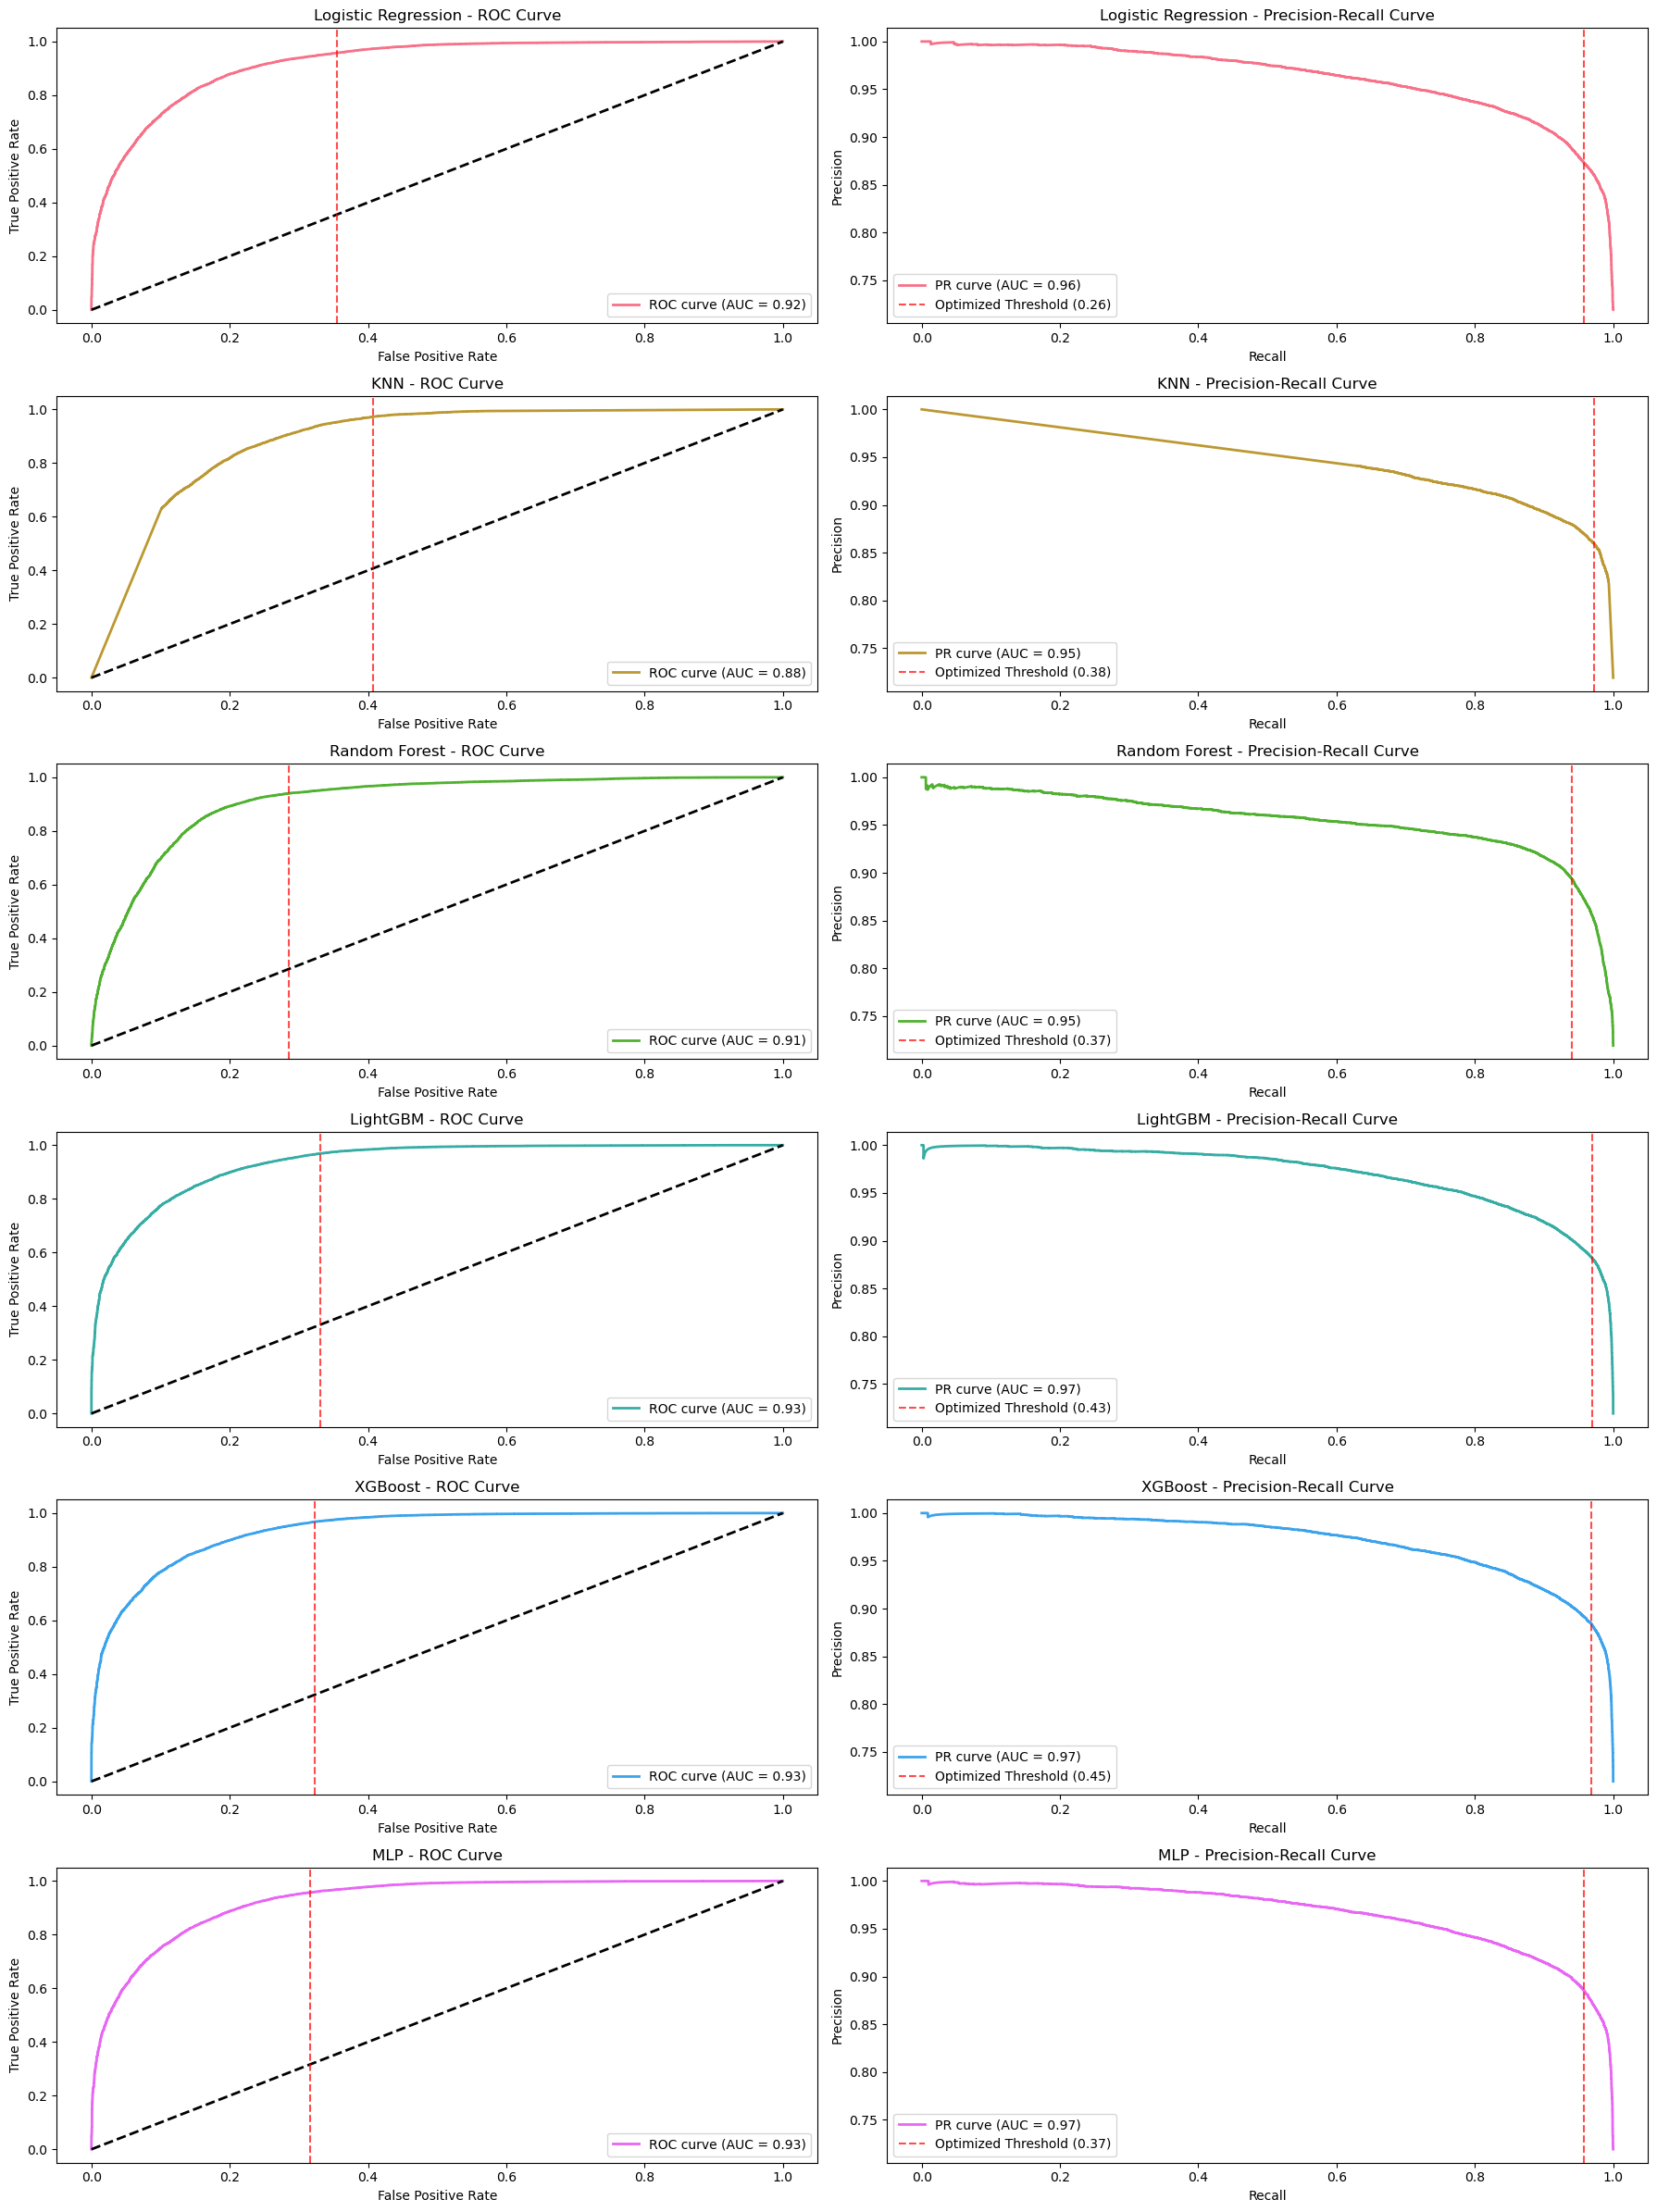

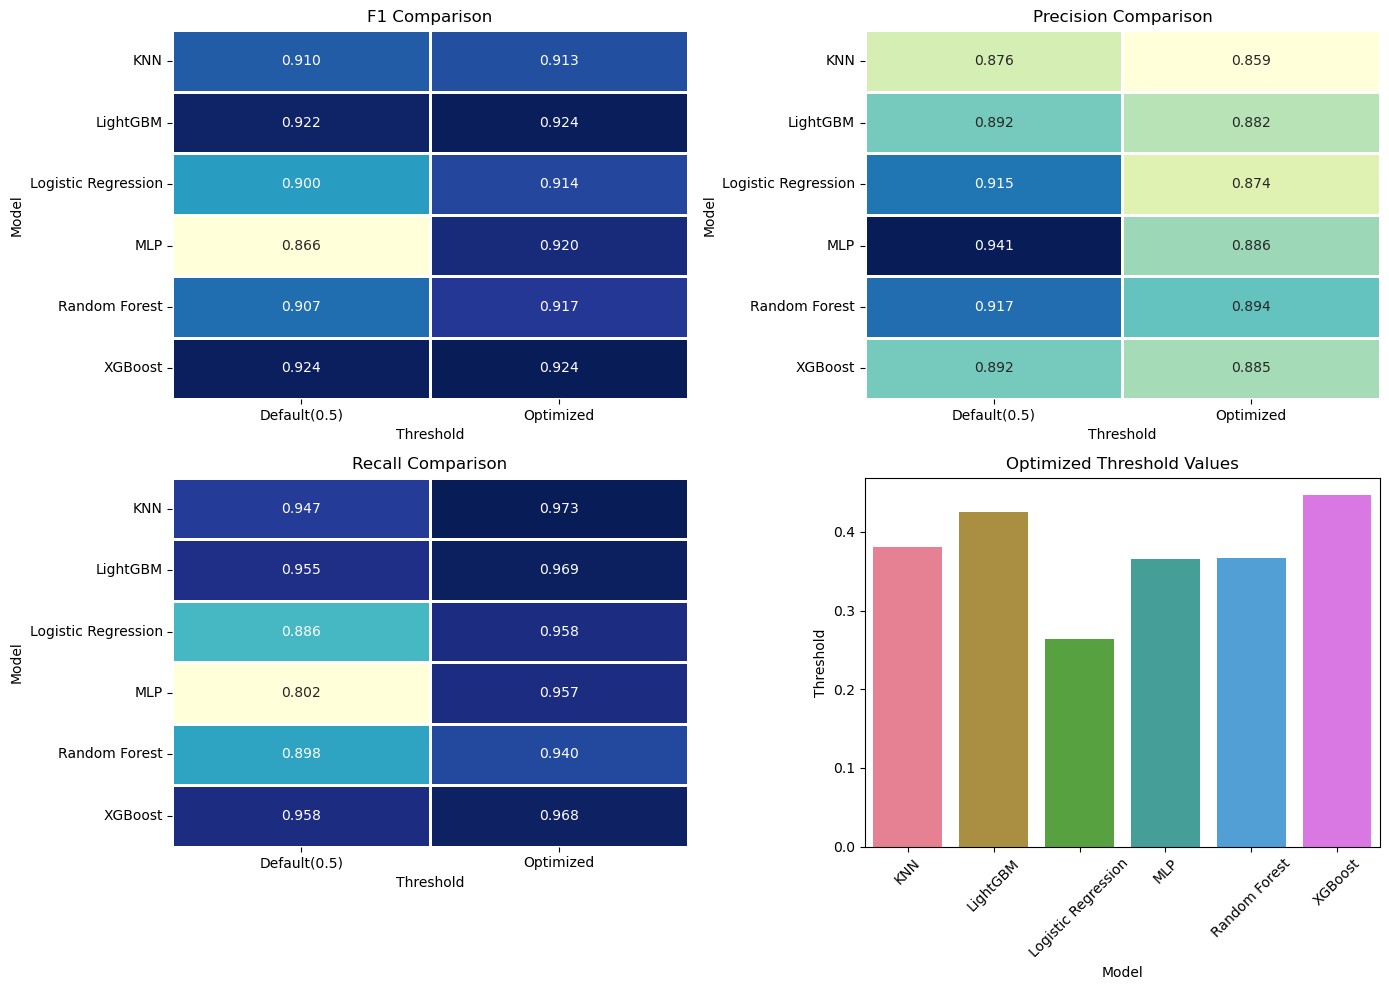


Optimized Threshold Results:


,Model,Threshold,AUC,F1,Precision,Recall
9,XGBoost,Optimized,0.934741,0.924399,0.884552,0.968005
7,LightGBM,Optimized,0.933538,0.923717,0.882259,0.969264
11,MLP,Optimized,0.926987,0.920201,0.885846,0.957328
5,Random Forest,Optimized,0.908810,0.916550,0.894160,0.940091
1,Logistic Regression,Optimized,0.918778,0.913705,0.873535,0.957747
3,KNN,Optimized,0.882573,0.912532,0.859497,0.972543


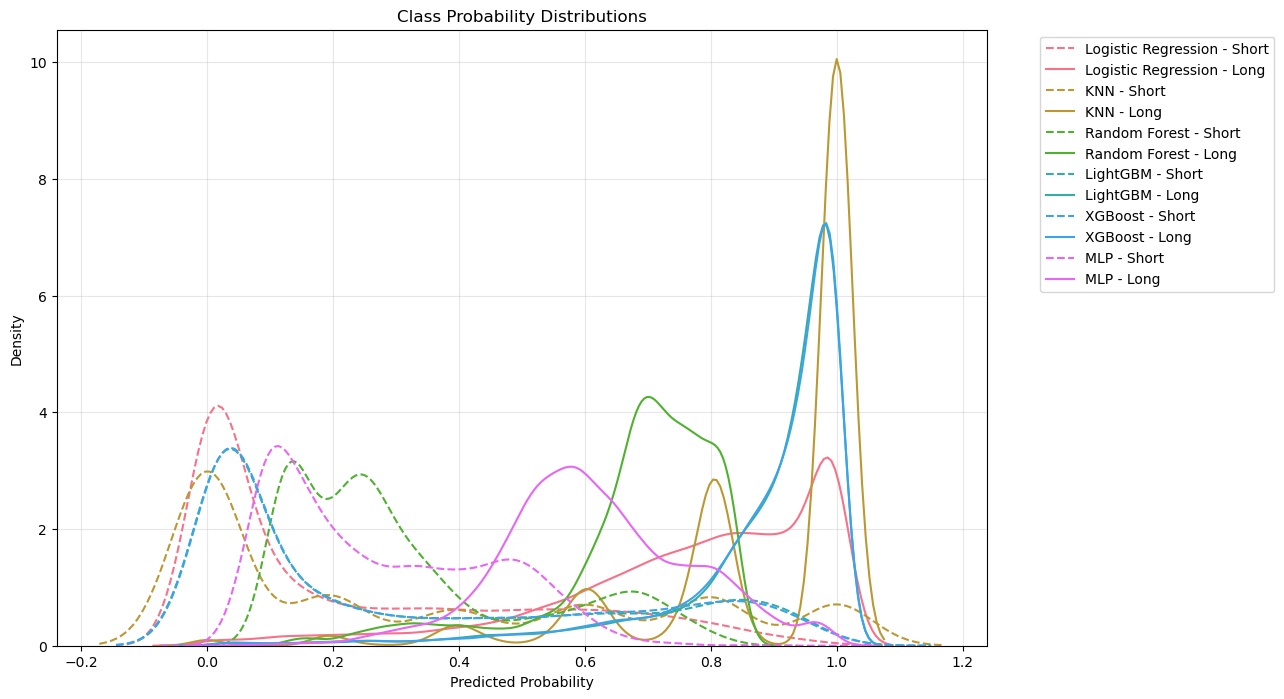

In [43]:
# ================= 结果可视化 =================
plt.figure(figsize=(18, 24))
gs = GridSpec(6, 2, figure=plt.gcf())

# 颜色配置
palette = sns.color_palette("husl", 6)

for idx, (model_name, data) in enumerate(threshold_dict.items()):
    y_proba = data['proba']
    best_threshold = data['best_threshold']
    
    # ROC曲线（需要获取thresholds参数）
    ax1 = plt.subplot(gs[idx, 0])
    fpr, tpr, thresholds_roc = roc_curve(y_val, y_proba)  # 获取ROC阈值
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=palette[idx], lw=2, 
             label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend(loc="lower right")
    
    # PR曲线
    ax2 = plt.subplot(gs[idx, 1])
    precision, recall, thresholds_pr = precision_recall_curve(y_val, y_proba)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, color=palette[idx], lw=2,
             label=f'PR curve (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{model_name} - Precision-Recall Curve')
    plt.legend(loc="upper right")
    
    # 阈值标记（修正括号和变量名）
    ax1.axvline(
        x=fpr[np.argmin(np.abs(thresholds_roc - best_threshold))],  # 补充闭合括号
        color='red', 
        linestyle='--', 
        alpha=0.7
    )
    ax2.axvline(
        x=data['optimized_metrics']['Recall'], 
        color='red', 
        linestyle='--', 
        alpha=0.7,
        label=f'Optimized Threshold ({best_threshold:.2f})'
    )
    ax2.legend()

plt.tight_layout()

# ================= 指标对比热力图 =================
results_df = pd.DataFrame(results)
pivot_df = results_df.pivot(index='Model', columns='Threshold')

plt.figure(figsize=(14, 10))
metrics = ['F1', 'Precision', 'Recall']

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    metric_df = pivot_df[metric]
    sns.heatmap(metric_df, annot=True, fmt=".3f", cmap="YlGnBu", 
                cbar=False, linewidths=1)
    plt.title(f'{metric} Comparison')
    plt.ylabel('Model')
    
plt.subplot(2, 2, 4)
thresholds = [threshold_dict[model]['best_threshold'] for model in pivot_df.index]
sns.barplot(x=pivot_df.index, y=thresholds, palette=palette)
plt.xticks(rotation=45)
plt.title('Optimized Threshold Values')
plt.ylabel('Threshold')

plt.tight_layout()
plt.show()

# ================= 最佳阈值结果表 =================
optimized_results = results_df[results_df['Threshold'] == 'Optimized']
print("\nOptimized Threshold Results:")
display(optimized_results.sort_values(by='F1', ascending=False))

# ================= 阈值分布可视化 =================
plt.figure(figsize=(12, 8))
for model_name, color in zip(models.keys(), palette):
    y_proba = threshold_dict[model_name]['proba']
    sns.kdeplot(y_proba[y_val==0], color=color, linestyle='--', 
                label=f'{model_name} - Short')
    sns.kdeplot(y_proba[y_val==1], color=color, 
                label=f'{model_name} - Long')
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.title('Class Probability Distributions')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()